In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import floor, ceil
from pylab import rcParams

%matplotlib inline

In [5]:
sns.set(style='ticks', palette='Spectral', font_scale=1.5)

material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
sns.set_palette(material_palette)
rcParams['figure.figsize'] = 16, 8

plt.xkcd();
random_state = 42
np.random.seed(random_state)
tf.set_random_seed(random_state)


In [9]:
math_df = pd.read_csv("student-mat.csv", sep = ";")
port_df = pd.read_csv("student-por.csv", sep = ";")

math_df["course"] = "math"
port_df["course"] = "portuguese"

merged_df = math_df.append(port_df)
merged_df.shape

(1044, 34)

merge_vector =

merge_vector =

In [12]:
merge_vector = ["school","sex","age","address",
                "famsize","Pstatus","Medu","Fedu",
                "Mjob","Fjob","reason","nursery","internet"]
duplicated_mask = merged_df.duplicated(keep=False,subset=merge_vector)
duplicated_df = merged_df[duplicated_mask]
unique_df = merged_df[~duplicated_mask]
both_courses_mask = duplicated_df.duplicated(subset=merge_vector)
both_courses_df = duplicated_df[~both_courses_mask].copy()
both_courses_df["course"] = "both"
students_df = unique_df.append(both_courses_df)

In [13]:
students_df = students_df.sample(frac=1)
students_df['alcohol'] = (students_df.Walc * 2 + students_df.Dalc * 5) / 7
students_df['alcohol'] = students_df.alcohol.map(lambda x: ceil(x))
students_df['drinker'] = students_df.alcohol.map(lambda x: "yes" if x > 2 else "no")

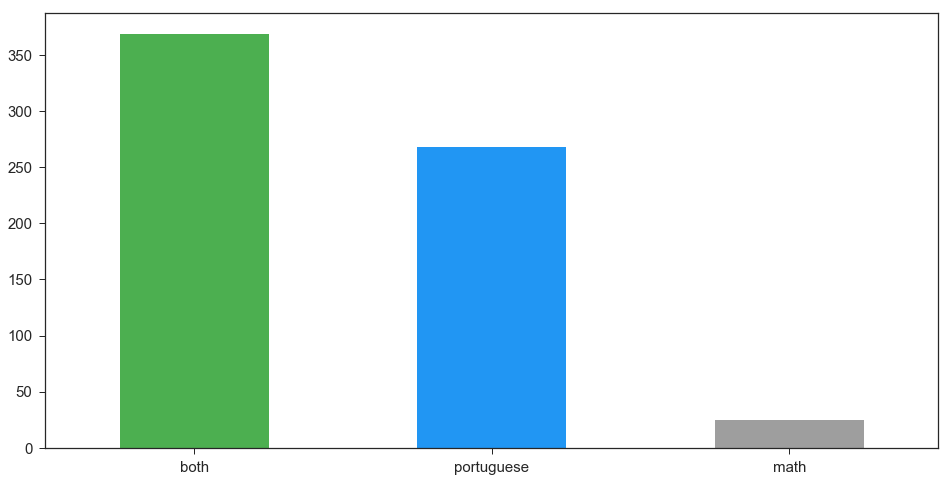

In [14]:
students_df.course.value_counts().plot(kind="bar", rot=0);

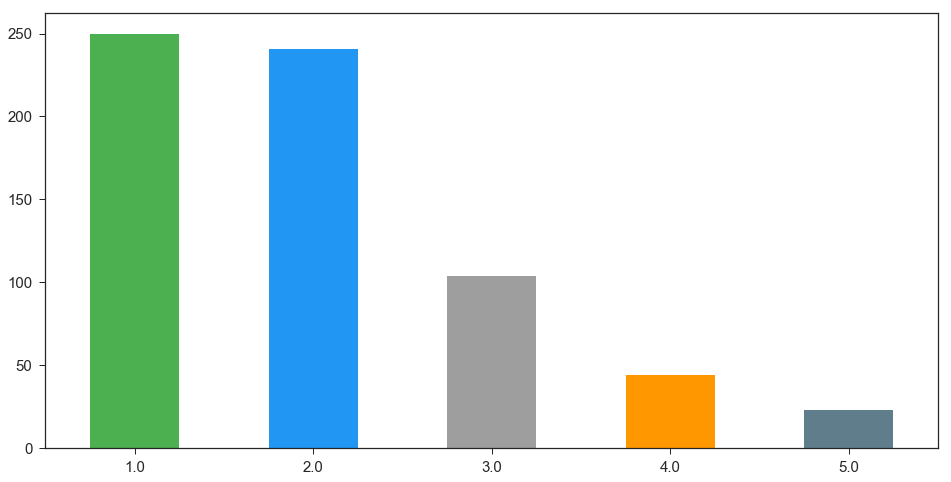

In [15]:
#Alcohol cosumption
students_df.alcohol.value_counts().plot(kind="bar", rot=0)

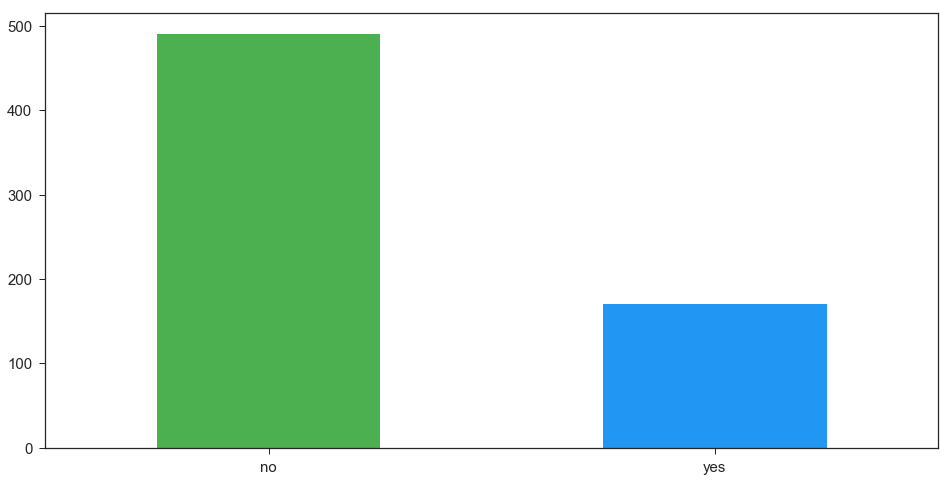

In [23]:
#Actual Prediction
students_df.drinker.value_counts().plot(kind = "bar", rot=0)

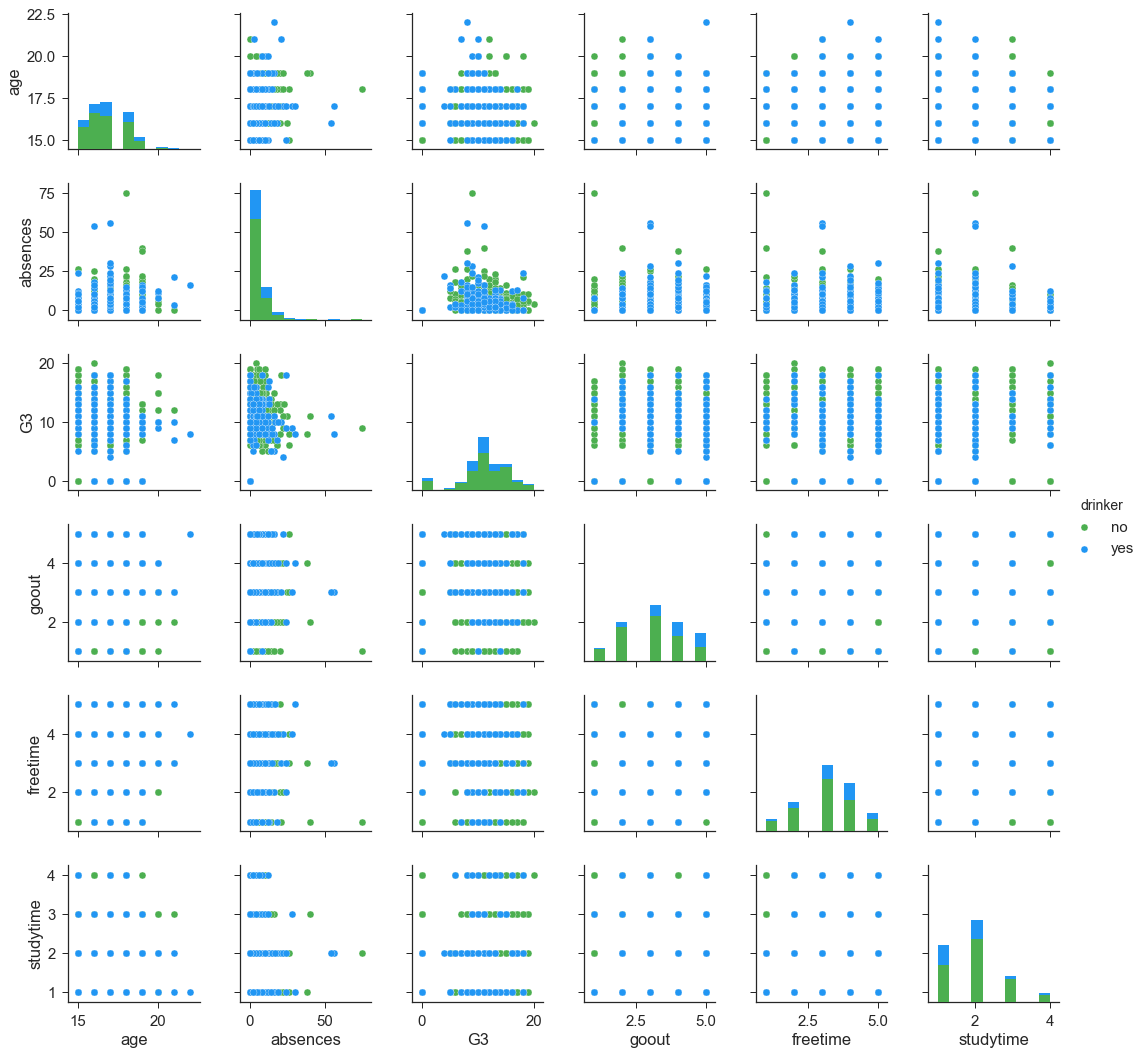

In [24]:
sns.pairplot(students_df[['age', 'absences', 'G3', 'goout', 'freetime', 'studytime', 'drinker']], hue='drinker');

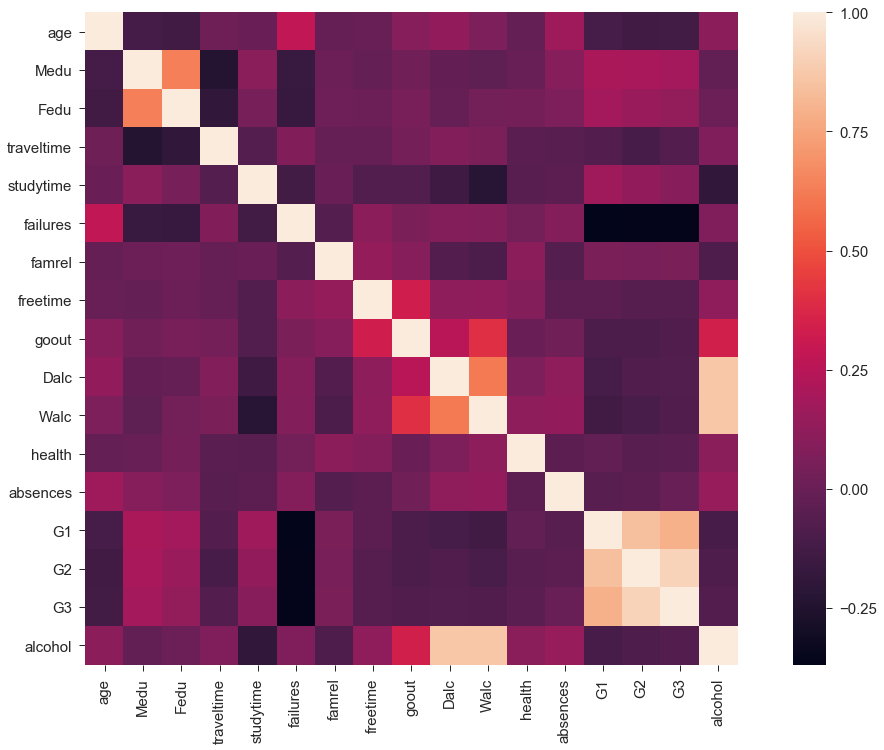

In [25]:
#General Correlation
corr_mat = students_df.corr()
fig, ax = plt.subplots(figsize = (20, 12))
sns.heatmap(corr_mat, vmax = 1.0, square = True, ax = ax)

In [26]:
#Encode Data
def encode(series):
    return pd.get_dummies(series.astype(str))

In [28]:
#Helper Function
train_x = pd.get_dummies(students_df.school)
train_x['age'] = students_df.age
train_x['absences'] = students_df.absences
train_x['g1'] = students_df.G1
train_x['g2'] = students_df.G2
train_x['g3'] = students_df.G3
train_x = pd.concat([train_x, encode(students_df.sex),
                    encode(students_df.Pstatus),
                    encode(students_df.Fedu),
                    encode(students_df.studytime),
                    encode(students_df.activities),
                    encode(students_df.romantic),
                    encode(students_df.paid), 
                    encode(students_df.health),
                    encode(students_df.course)
                    ], axis = 1)
train_y = encode(students_df.drinker)

In [35]:
#Splitting Up Data
#Let us allocate 90% of data to train set and 10% to test set
train_size = 0.9

train_cnt = floor(train_x.shape[0] * train_size)


In [36]:
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer